In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
# Carregar os dados
data_path = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1"
df = pd.read_csv(data_path)

In [4]:
# Remover colunas desnecessárias
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [5]:
# Separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [6]:
# Padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

In [7]:
# Codificar a variável alvo
y = LabelEncoder().fit_transform(y)

In [8]:
# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Antes do oversampling
print("[Antes do Oversampling] Distribuição das classes:")
print(pd.Series(y_train).value_counts())

[Antes do Oversampling] Distribuição das classes:
0    249
1    149
dtype: int64


In [10]:
# Instanciar o modelo XGBoost
ml_model = XGBClassifier()

In [11]:
# Treinar o modelo
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [12]:
# Realizar previsões no dataset de teste
y_pred = ml_model.predict(X_test)

In [13]:
# Calcular a acurácia antes do oversampling
accuracy_before_oversampling = accuracy_score(y_test, y_pred)
print('\n[Acurácia antes do Oversampling] XGBoost:', accuracy_before_oversampling)


[Acurácia antes do Oversampling] XGBoost: 0.9824561403508771


In [14]:
# Imprimir o classification report antes do oversampling
print('\n[Classification Report antes do Oversampling] XGBoost:')
print(classification_report(y_test, y_pred))


[Classification Report antes do Oversampling] XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [15]:
# Aplicar o Random Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [16]:
# Depois do oversampling
print("\n[Depois do Oversampling] Distribuição das classes:")
print(pd.Series(y_resampled).value_counts())


[Depois do Oversampling] Distribuição das classes:
0    249
1    249
dtype: int64


In [17]:
# Treinar o modelo novamente com os dados balanceados
ml_model_after_oversampling = XGBClassifier()
ml_model_after_oversampling.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
# Realizar previsões no dataset de teste após o oversampling
y_pred_after_oversampling = ml_model_after_oversampling.predict(X_test)

In [19]:
# Calcular a acurácia após o oversampling
accuracy_after_oversampling = accuracy_score(y_test, y_pred_after_oversampling)
print('\n[Acurácia após o Oversampling] XGBoost:', accuracy_after_oversampling)


[Acurácia após o Oversampling] XGBoost: 0.9766081871345029


In [20]:
# Imprimir o classification report após o oversampling
print('\n[Classification Report após o Oversampling] XGBoost:')
print(classification_report(y_test, y_pred_after_oversampling))


[Classification Report após o Oversampling] XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



C:\Users\55199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\55199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


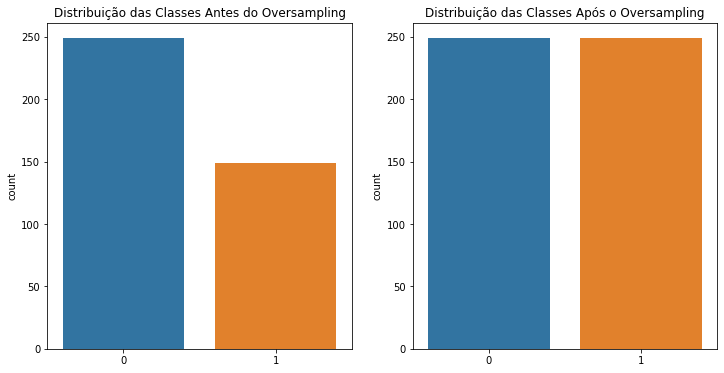

In [21]:
# Plotar gráfico da distribuição das classes antes e depois do oversampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Distribuição das Classes Antes do Oversampling")
sns.countplot(y_train)
plt.subplot(1, 2, 2)
plt.title("Distribuição das Classes Após o Oversampling")
sns.countplot(y_resampled)
plt.show()

In [22]:
ml_model.score(X_train,y_train)

1.0

In [23]:
#Retorna a precisão média do modelo nos dados de teste, que é a proporção de previsões corretas
ml_model.score(X_test, y_test)

0.9824561403508771

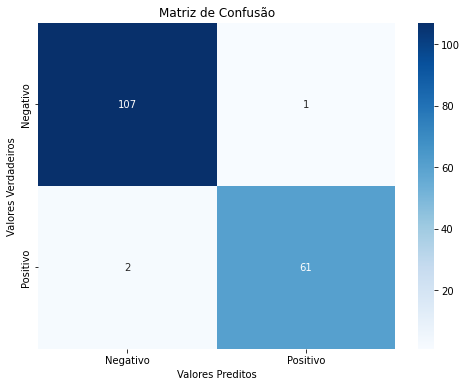

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão em um gráfico de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()